<a href="https://colab.research.google.com/github/norayehia/cifar_data_computervision/blob/main/cnncifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import  ImageDataGenerator
from tensorflow.keras.preprocessing import image
import keras
import keras.utils 


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
BATCH_SIZE = 64
NUM_CLASSES = 10
#binarize
train_labels_categories = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)#.astype('uint8')
train_labels_categories

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Splitting the training data into train set and validation set
x_train, x_val, y_train, y_val = train_test_split(X_train, train_labels_categories, random_state=0, test_size=0.05)

In [ ]:
model=tf.keras.models.Sequential(
[#16 filter ,inputshapesize200*200 RGB *3
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(32, 32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #32 filter
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    #activation and outputlayes
    tf.keras.layers.Dense(512,activation='relu'),
    #2clases need on nerron 
    tf.keras.layers.Dense(10,activation='softmax')
    
]
)

In [ ]:
model.compile(loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=( x_val, y_val))

Epoch 1/10
1485/1485 [==============================] - 52s 34ms/step - loss: 1.5798 - categorical_accuracy: 0.4292 - val_loss: 1.2854 - val_categorical_accuracy: 0.5312
Epoch 2/10
1485/1485 [==============================] - 44s 30ms/step - loss: 1.2044 - categorical_accuracy: 0.5768 - val_loss: 1.1839 - val_categorical_accuracy: 0.5716
Epoch 3/10
1485/1485 [==============================] - 44s 29ms/step - loss: 1.0425 - categorical_accuracy: 0.6330 - val_loss: 1.4189 - val_categorical_accuracy: 0.5384
Epoch 4/10
1485/1485 [==============================] - 43s 29ms/step - loss: 0.9359 - categorical_accuracy: 0.6733 - val_loss: 1.1345 - val_categorical_accuracy: 0.6060
Epoch 5/10
1485/1485 [==============================] - 43s 29ms/step - loss: 0.8611 - categorical_accuracy: 0.7002 - val_loss: 1.0166 - val_categorical_accuracy: 0.6588
Epoch 6/10
1485/1485 [==============================] - 43s 29ms/step - loss: 0.8039 - categorical_accuracy: 0.7205 - val_loss: 0.9847 - val_categoric

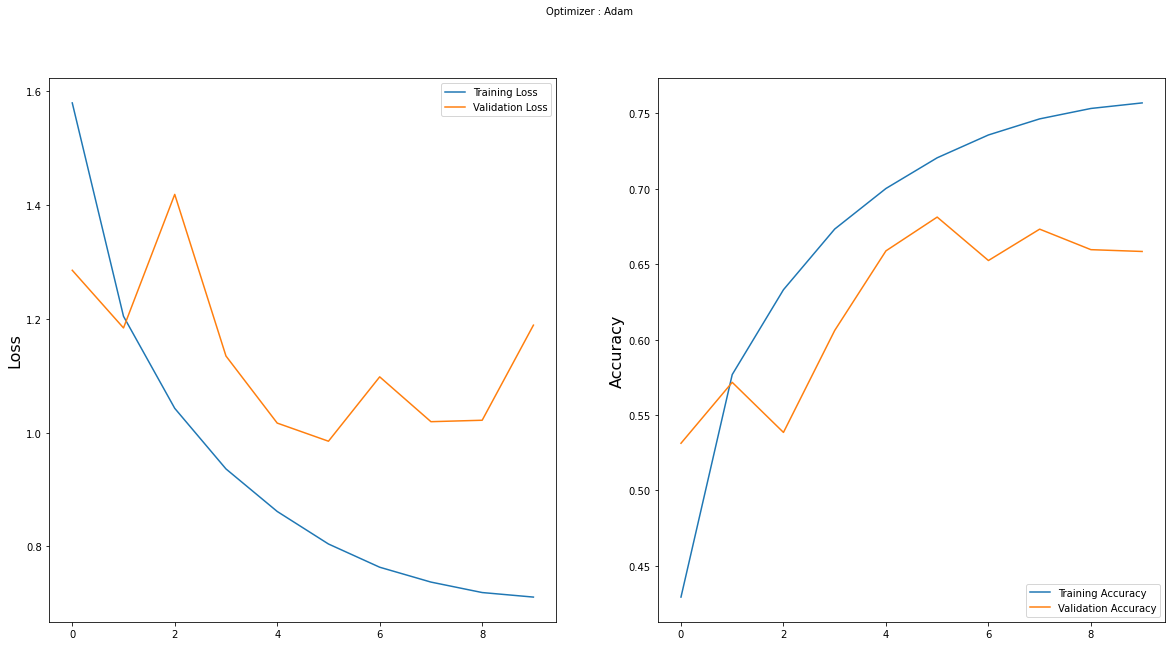

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred2g=model.predict(X_test)

In [ ]:
y_pred22g = tf.argmax(y_pred2g, axis=-1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred22g, target_names = class_names))

              precision    recall  f1-score   support

    airplane       0.74      0.71      0.72      1000
  automobile       0.89      0.76      0.82      1000
        bird       0.68      0.47      0.56      1000
         cat       0.48      0.28      0.36      1000
        deer       0.67      0.53      0.59      1000
         dog       0.36      0.83      0.51      1000
        frog       0.89      0.59      0.71      1000
       horse       0.65      0.75      0.70      1000
        ship       0.72      0.80      0.76      1000
       truck       0.81      0.75      0.78      1000

    accuracy                           0.65     10000
   macro avg       0.69      0.65      0.65     10000
weighted avg       0.69      0.65      0.65     10000



In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_pred22g)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[708  11  26  13  12  49   6  27 126  22]
 [ 20 764   4   8   4  39   3  12  59  87]
 [ 75   3 470  50  61 241  21  56  21   2]
 [ 13   6  41 285  51 520  17  46  14   7]
 [ 23   2  57  64 526 176  15 123  14   0]
 [  6   1  21  55  23 829   5  52   3   5]
 [  7   1  48  72  66 171 591  23  14   7]
 [  9   0  11  11  32 179   0 747   3   8]
 [ 65  15  11  15   7  31   6  15 802  33]
 [ 32  57   4  16   4  45   3  41  52 746]]


In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

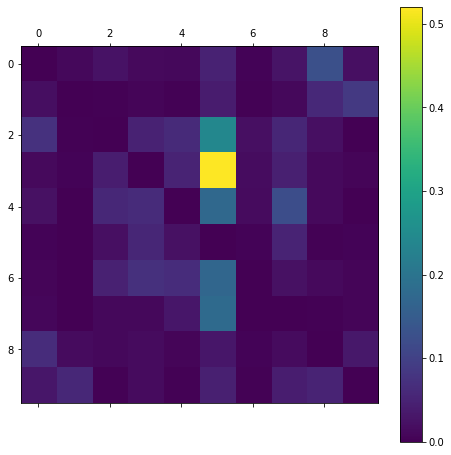

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)

plt.show()